## Import Packages

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import wget
import itertools
import timeit
import pygrib

import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import datetime
from datetime import timedelta

from datablock import *
from dataform import *

datadir = '/home/q1park/mesocyclones/data_validation/'

/home/q1park/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#grbconvert(datadir, files = listdir(datadir, 'grb')[0][3:9])

In [3]:
truth1 = ['05032220i_t.ays', '200503222000', -82.35, 31.32, 'waycrossga']
truth2 = ['05032220m_t.aby', '200503222000', -84.19, 31.54, 'albanyga']
truth3 = ['07050423.LMN', '200705042300', -97.48, 36.62, 'lamontok']
truth4 = ['08020600.LZK', '200802060000', -92.29, 34.75, 'littlerockar']
truth5 = ['08061200.TOP', '200806120000', -95.81, 39.09, 'topekaks']
truth6 = ['09021100.FWD', '200902110000', -97.30, 32.83, 'ftworthtx']
truth7 = ['14061619.OAX', '201406191900', -95.93, 41.26,'omahane']

In [4]:
valmenu = gribmenu()
valmenu.dirmenu(datadir, 'grb2')
valmenu.menu[:3]

,name,res,datetime,fchr,ext,url
0,rap,252,2014-06-19 18:00:00,0,grb2,N/A
1,rap,252,2014-06-19 19:00:00,0,grb2,N/A
2,rap,252,2014-06-19 20:00:00,0,grb2,N/A


In [5]:
gribfile7 = valmenu.menuselect(datetime = str2dt(truth7[1]) ) 
gribfile6 = valmenu.menuselect(datetime = str2dt(truth6[1]) ) 
gribfile3 = valmenu.menuselect(datetime = str2dt(truth3[1]) ) 

In [6]:
valmenu.checklocal(checkdir = datadir)

Missing  0  files total


In [7]:
grib7 = pygrib.open(datadir + valmenu.menuselect(datetime = str2dt(truth7[1]) ) )
grib6 = pygrib.open(datadir + valmenu.menuselect(datetime = str2dt(truth6[1]) ) )
grib3 = pygrib.open(datadir + valmenu.menuselect(datetime = str2dt(truth3[1]) ) )

In [8]:
gridbnd7 = np.array([[-100, -95], [40, 45]])
#gridbnd7 = np.array([[-130, -70], [25, 55]])
res7 = 0.025
snd7 = wxblocks(gridbnd7, res7)

gridbnd6 = np.array([[-100, -95], [30, 35]])
#gridbnd6 = np.array([[-130, -70], [25, 55]])
res6 = 0.025
snd6 = wxblocks(gridbnd6, res6)

gridbnd3 = np.array([[-100, -95], [35, 40]])
#gridbnd3 = np.array([[-130, -70], [25, 55]])
res3 = 0.025
snd3 = wxblocks(gridbnd3, res3)

In [9]:
#snd7.grb2sound(grib7)

In [10]:
#snd6.grb2sound(grib6)

In [11]:
#snd6.save_h5(datadir + 's_' + re.split('\.', gribfile6)[0] + '.hdf5')
#snd7.save_h5(datadir + 's_' + re.split('\.', gribfile7)[0] + '.hdf5')

In [12]:
snd6a = wxblocks(gridbnd6, res6)
snd6a.load_h5(datadir + 's_' + re.split('\.', gribfile6)[0] + '.hdf5')

In [13]:
snd7a = wxblocks(gridbnd7, res7)
snd7a.load_h5(datadir + 's_' + re.split('\.', gribfile7)[0] + '.hdf5')

In [14]:
def sounding_comparison(dictsim, dictspc):
    nr, nc = 3,2

    plotnames = np.array(list(dictsim.keys())[:-1]).reshape(nr, nc)
    ylabels = np.vectorize(unidict.get)(plotnames)
    xlabels = np.array([[r'Pressure $mb$']*nc]*nr)

    fig, axes = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=False, figsize=(nc*6, nr*4))
    pad = 5 # in points

    for ax, name, ylabel, xlabel in zip(axes.ravel(), plotnames.ravel(), 
                                        ylabels.ravel(), xlabels.ravel()):
    
        ax.annotate(name, xy=(0.5, 1.025), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='xx-large', ha='center', va='baseline');
        ax.annotate(ylabel, xy=(0., 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='center', va='center', rotation=90);
        ax.annotate(xlabel, xy=(0.5, 0.), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline');
    
        simY, simX = dictsim.get(name), dictsim.get('PRES')
        spcY, spcX = dictspc.get(name), dictspc.get('PRES')
    
        leg1 = ax.plot(spcX[spcY>-8888.], spcY[spcY>-8888.], color="red")
        leg2 = ax.plot(simX, simY, color="blue")
    
    fig.subplots_adjust(wspace=0.3, hspace=0.25, top=0.95);

    legendkey = ["RAP Grid Data", "Actual Sounding"];
        
    fig.legend([leg2, leg1],     # The line objects
               labels=legendkey,   # The labels for each line
               loc=(0.29,0.55),   # Position of legend
               borderaxespad=0.5,    # Small spacing around legend box
               title="Sounding Comparison" );

In [15]:
soundvars = soundvars + ['PRES']
soundunis = [r'$C^o$', r'$km$', r'$C^o$', '%', r'deg', r'$kts$', r'$mb$']
unidict = dict(zip(soundvars, soundunis))

soundvars
soundunis

['TMP', 'DWPT', 'HGT', 'RH', 'WDIR', 'WSPD', 'PRES']

['$C^o$', '$km$', '$C^o$', '%', 'deg', '$kts$', '$mb$']

/home/q1park/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


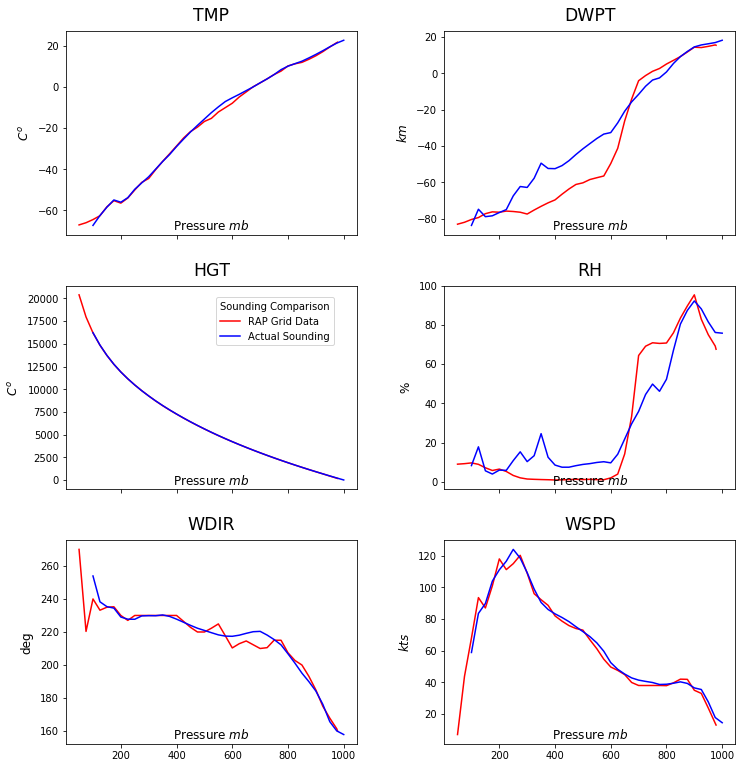

In [16]:
sounddata = snd6a.soundpoint(truth6[2],truth6[3])
simdict = dict(zip(soundvars, sounddata) )

spcfile = open(datadir+'/'+truth6[0], 'r').read()
spcsounddata = parseSPC(spcfile)
spcdict = dict(zip(soundvars, spcsounddata) )

sounding_comparison(simdict, spcdict)

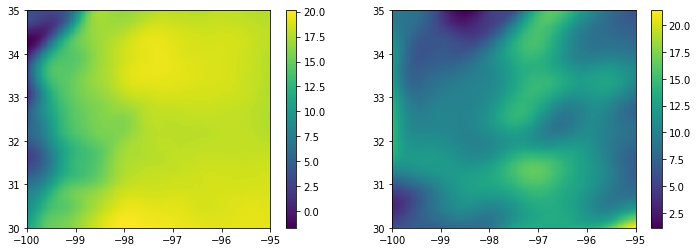

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(2*6, 1*4))
snd6a.plot2fig(1000, 'DWPT', fig, axes[0]);
snd6a.plot2fig(1000, 'WSPD', fig, axes[1]);

/home/q1park/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


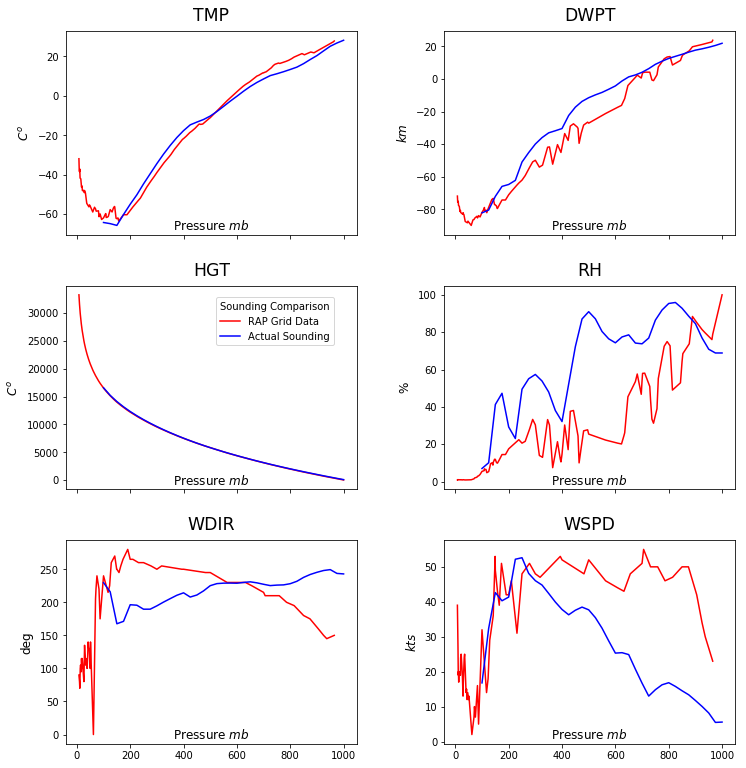

In [19]:
sounddata = snd7a.soundpoint(truth7[2],truth7[3])
simdict = dict(zip(soundvars, sounddata) )

spcfile = open(datadir+'/'+truth7[0], 'r').read()
spcsounddata = parseSPC(spcfile)
spcdict = dict(zip(soundvars, spcsounddata) )

sounding_comparison(simdict, spcdict)

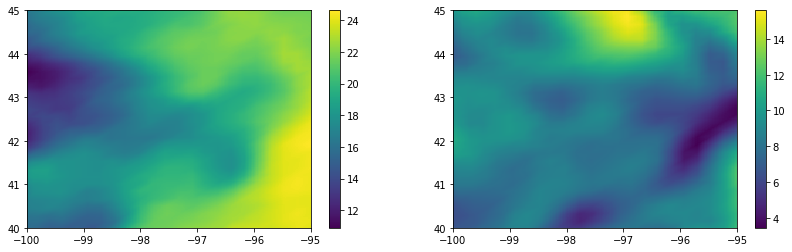

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(2*7, 1*4))
snd7a.plot2fig(1000, 'DWPT', fig, axes[0]);
snd7a.plot2fig(1000, 'WSPD', fig, axes[1]);

In [ ]:
prof = profile.create_profile(profile='default', 
                              pres=spcdict.get('PRES'), 
                              hght=spcdict.get('HGT'), 
                              tmpc=spcdict.get('TMP'),
                              dwpc=spcdict.get('DWPT'), 
                              wspd=spcdict.get('WSPD'), 
                              wdir=spcdict.get('WDIR'), 
                              missing=-9999.00, strictQC=False)